# MRI plotting

In [14]:
%matplotlib notebook


# Download Data MR

In [2]:
import tempfile

# Create a temporary directory
d = tempfile.mkdtemp()

In [3]:
import os

# Return the tail of the path
os.path.basename('http://google.com/attention.zip')

'attention.zip'

In [4]:
from urllib.request import urlretrieve

# Define URL
url = 'http://www.fil.ion.ucl.ac.uk/spm/download/data/attention/attention.zip'

# Retrieve the data
fn, info = urlretrieve(url, os.path.join(d, 'attention.zip'))

In [6]:
print( fn , info)

C:\Users\mania\AppData\Local\Temp\tmpb1l4zk27\attention.zip Date: Mon, 11 May 2020 12:59:37 GMT
Server: Apache/2.2.15 (CentOS)
Strict-Transport-Security: max-age=63072000; includeSubdomains
X-Frame-Options: DENY
X-Content-Type-Options: nosniff
Last-Modified: Mon, 12 Oct 2015 15:09:14 GMT
ETag: "d55aa359-4ec00ac-521e9b659fa80"
Accept-Ranges: bytes
Content-Length: 82575532
Connection: close
Content-Type: application/zip




In [7]:
import zipfile

# Extract the contents into the temporary directory we created earlier
zipfile.ZipFile(fn).extractall(path=d)

In [8]:
# List first 10 files
[f.filename for f in zipfile.ZipFile(fn).filelist[:10]]

['attention/',
 'attention/multi_block_regressors.mat',
 'attention/README_DATA.txt',
 'attention/factors.mat',
 'attention/functional/',
 'attention/functional/snffM00587_0201.hdr',
 'attention/functional/snffM00587_0040.img',
 'attention/functional/snffM00587_0458.hdr',
 'attention/functional/snffM00587_0185.img',
 'attention/functional/snffM00587_0018.hdr']

In [10]:
import nibabel

In [11]:
# Read the image 
struct = nibabel.load(os.path.join(d, 'attention/structural/nsM00587_0002.hdr'))

# Get a plain NumPy array, without all the metadata
struct_arr = struct.get_data()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


In [12]:
from skimage import io

struct_arr = io.imread("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/attention-mri.tif")

<IPython.core.display.Javascript object>


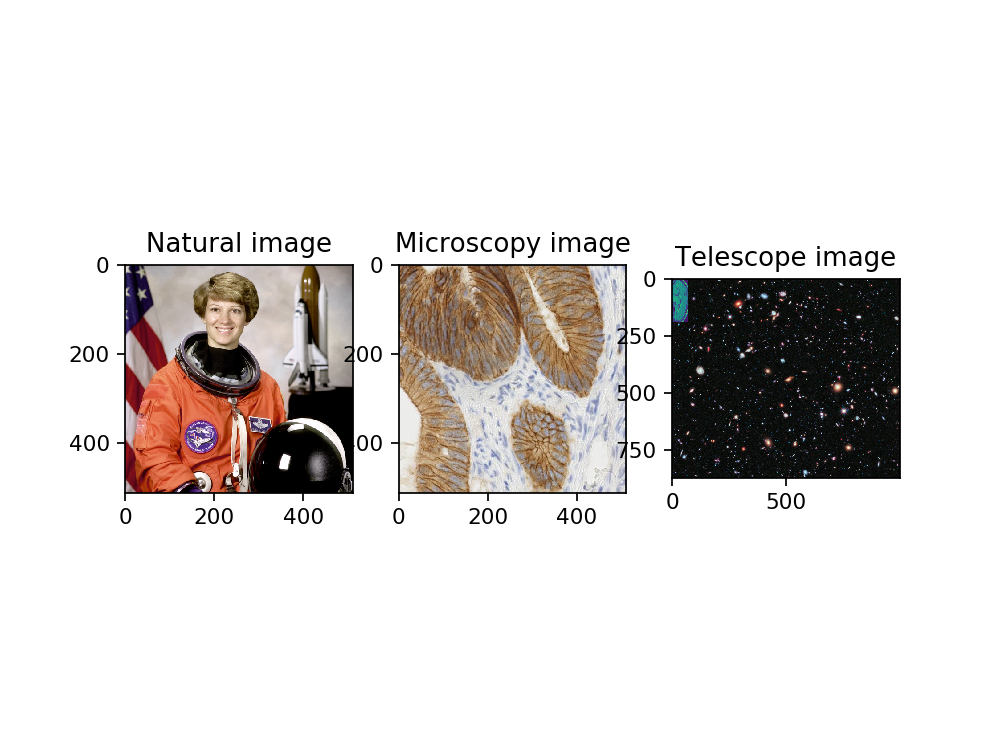

In [15]:
import matplotlib.pyplot as plt
from skimage import data

astronaut = data.astronaut()
ihc = data.immunohistochemistry()
hubble = data.hubble_deep_field()

# Initialize the subplot panels side by side
fig, ax = plt.subplots(nrows=1, ncols=3)

# Show an image in each subplot
ax[0].imshow(astronaut)
ax[0].set_title('Natural image')
ax[1].imshow(ihc)
ax[1].set_title('Microscopy image')
ax[2].imshow(hubble)
ax[2].set_title('Telescope image');

# show one slice ( vertical cut)

<IPython.core.display.Javascript object>


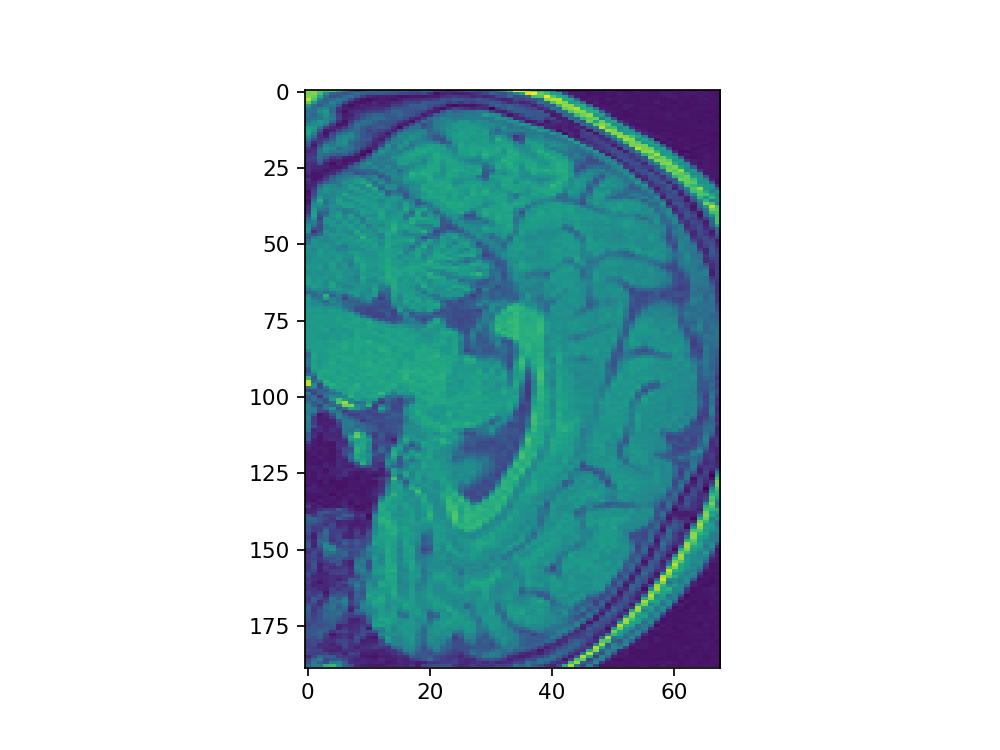

In [24]:
plt.imshow(struct_arr[75],aspect=0.5)
plt.show()

# show slide (horizontal cut)

<IPython.core.display.Javascript object>


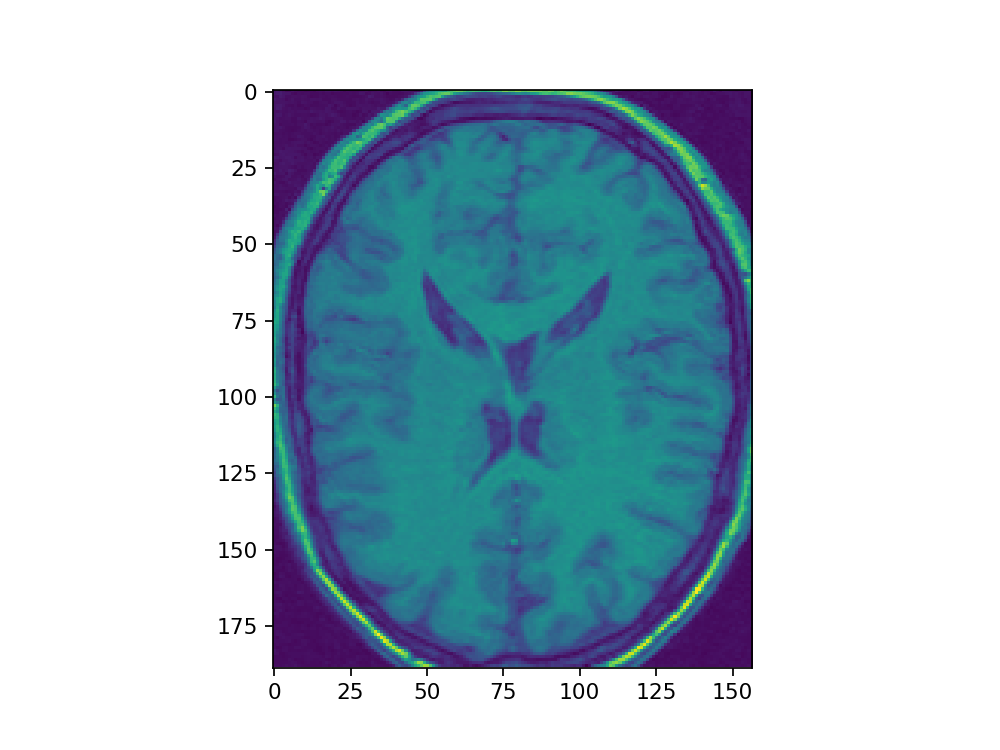

In [25]:
struct_arr2 = struct_arr.T
plt.imshow(struct_arr2[34])

In [26]:
print(struct_arr.shape)

(157, 189, 68)


# connect to canvas event handler and reassign K an J keys 

In [30]:
def multi_slice_viewer(volume):
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    """Go to the previous slice."""
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    """Go to the next slice."""
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

<IPython.core.display.Javascript object>


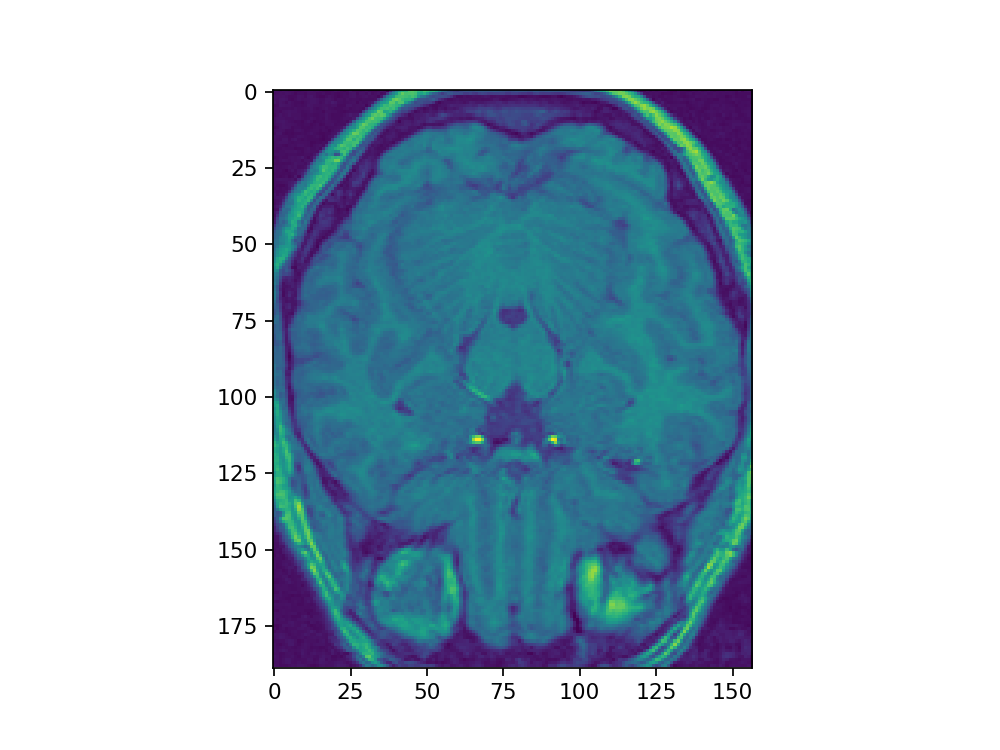

In [31]:
multi_slice_viewer(struct_arr2)


In [32]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

In [33]:
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

<IPython.core.display.Javascript object>


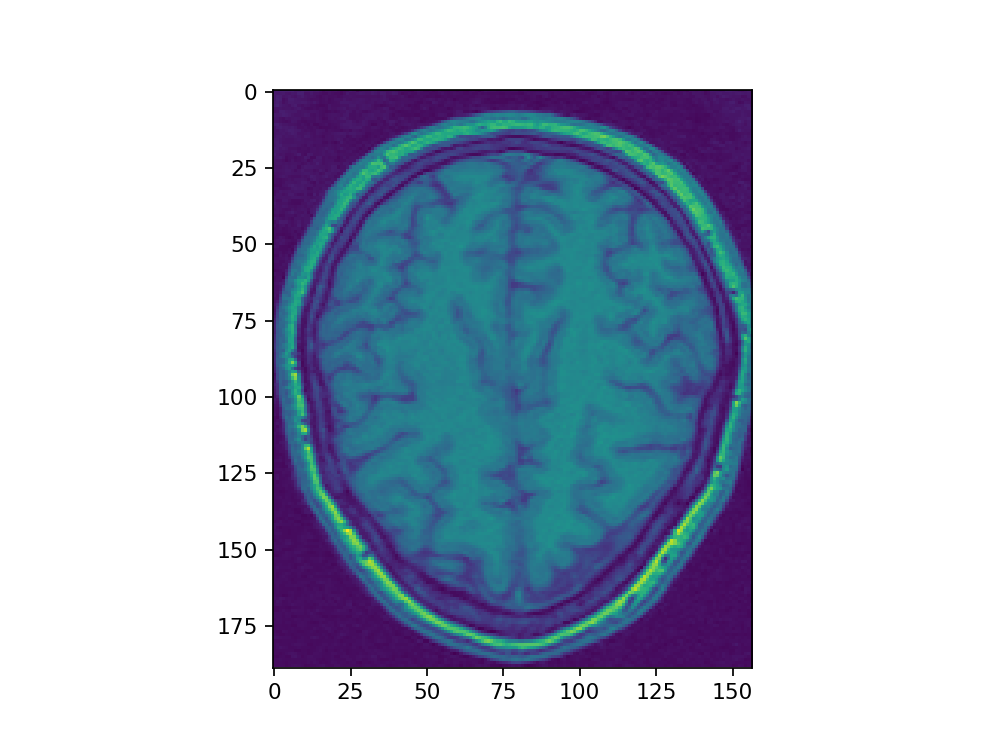

In [34]:
multi_slice_viewer(struct_arr2)


# clean up

In [35]:
import shutil

# Remove the temporary directory
shutil.rmtree(d)